# Análise sobre evolução da capacidade dos leitos durante a pandemia de Covid-19 no estado de Goiás

Esse projeto tem como fonte os dados obtidos através do site DataSUS, subsistema LT do sistema CNES (Cadastro Nacional de Estabelecimentos de Saúde), com intuito de responder as seguintes questões:

 - 1: Comparar distribuição geográfica dos leitos por município antes e depois da pandemia
 - 2: Evolução do número de leitos durante os anos;
 - 3: Verificar declínio na capacidade hospitalar instalada;
 - 4: Comparar a quantidade de leitos SUS e não SUS no tempo e espaço.

 Dados obtidos através da biblioteca microdatasus, em linguagem R.

 SALDANHA, Raphael de Freitas; BASTOS, Ronaldo Rocha; BARCELLOS, Christovam. Microdatasus: pacote para download e pré-processamento de microdados do Departamento de Informática do SUS (DATASUS). Cad. Saúde Pública, Rio de Janeiro , v. 35, n. 9, e00032419, 2019 . Available from http://ref.scielo.org/dhcq3y.

Abaixo o dicionário de dados, de acordo com a documentação presente no site ftp://ftp.datasus.gov.br/dissemin/publicos/CNES/200508_/doc/IT_CNES_1706.pdf.

| SEQ | CAMPO | TIPO E TAM | DESCRIÇÃO |
|-----|-------|------------|-----------|
| 1 | CNES | CHAR (7) | Número nacional do estabelecimento de saúde |
| 2 | CODUFMUN | CHAR (6) | Código do município do estabelecimento UF+ MUNIC (sem dígito)
| 4 | REGSAUDE | CHAR (6) | Código da região de saúde
| 5 | MICR_REG | CHAR (4) | Código da micro-região de saúde
| 6 | DISTRSAN | CHAR (4) | Código do distrito sanitário
| 7 | DISTRADM | CHAR (1) | Código do distrito administrativo
| 8 | PF_PJ | CHAR (1) | Indicador de pessoa: 1-Física 3-Jurídica
| 9 |CPF_CNPJ | CHAR (14) | CPF do Estabelecimento, caso pessoa física OU CNPJ, caso pessoa jurídica
| 10 | NIV_DEP | CHAR (1) | Grau de dependência: 1-Individual 3-Mantida
| 11 | CNPJ_MAN | CHAR (14) | CNPJ da mantenedora do Estabelecimento
| 12 | ESFERA_A | CHAR (2) | Código da esfera administrativa
| 13 | ATIVIDAD | CHAR (2) | Código da atividade de ensino
| 14 | RETENCAO | CHAR (2) | Código de retenção de tributos
| 15 | NATUREZA | CHAR (2) | Código da natureza da organização
| 16 | CLIENTEL | CHAR (2) | Código de fluxo da clientela
| 17 | TP_UNID | CHAR (2) | Tipo de unidade (Estabelecimento)
| 18 | TURNO_AT | CHAR (2) | Código de turno de atendimento
| 19 | NIV_HIER | CHAR (2) | Código do nível de hierarquia
| 20 | TERCEIRO | CHAR (1) | O estabelecimento é terceiro: 1-Sim 0-Não
| 21 | TP_LEITO | CHAR (2) | Tipo do LEITO
| 22 | CODLEITO | CHAR (2) | Especialidade do LEITO
| 23 | QT_EXIST | NUMERIC (4) | Quantidade de leitos existentes
| 24 | QT_CONTR | NUMERIC (4) | Quantidade de leitos contratados
| 25 | QT_SUS | NUMERIC (4) | Quantidade de leitos para o SUS
| 26 | QT_NSUS| CHAR(1) | Indicador de EQUIPAMENTO NÃO DISPONÍVEL para o SUS, onde: 1 = SIM 0 = NÃO
| 27 | COMPETEN | CHAR (6) | Ano e Mês de competência da informação (AAAAMM)
| 28 | NAT_JUR | CHAR (4) | Natureza Jurídica

# 0.0 Imports

In [29]:
import csv
import subprocess

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt


## 0.1 Getting Data

In [13]:
get_data = subprocess.call("Rscript ../notebooks/get_data_datasus.R", shell=True)
get_data

Your local Internet connection seems to be ok.
DataSUS FTP server seems to be up. Starting download...
trying URL 'ftp://ftp.datasus.gov.br/dissemin/publicos/CNES/200508_/Dados/LT/LTGO1901.dbc'
Content type 'unknown' length 32104 bytes (31 KB)
trying URL 'ftp://ftp.datasus.gov.br/dissemin/publicos/CNES/200508_/Dados/LT/LTGO1902.dbc'
Content type 'unknown' length 32114 bytes (31 KB)
trying URL 'ftp://ftp.datasus.gov.br/dissemin/publicos/CNES/200508_/Dados/LT/LTGO1903.dbc'
Content type 'unknown' length 32215 bytes (31 KB)
trying URL 'ftp://ftp.datasus.gov.br/dissemin/publicos/CNES/200508_/Dados/LT/LTGO1904.dbc'
Content type 'unknown' length 32135 bytes (31 KB)
trying URL 'ftp://ftp.datasus.gov.br/dissemin/publicos/CNES/200508_/Dados/LT/LTGO1905.dbc'
Content type 'unknown' length 31984 bytes (31 KB)
trying URL 'ftp://ftp.datasus.gov.br/dissemin/publicos/CNES/200508_/Dados/LT/LTGO1906.dbc'
Content type 'unknown' length 31848 bytes (31 KB)
trying URL 'ftp://ftp.datasus.gov.br/dissemin/publi

0

## 0.2. Loading Data

In [2]:
data_raw = pd.read_csv("../data/raw/cnes_lt-2019_2022.csv", index_col= 0)
data_raw.sample(5)

/tmp/ipykernel_5614/3053487540.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv("../data/raw/cnes_lt-2019_2022.csv", index_col= 0)


,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
60208,2337568,520540,4,NaN,NaN,NaN,M,3,1307750000173,1,...,NaN,NaN,1,5,1,0,0,1,202010,2062
83870,2534584,520860,NaN,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,1,6,4,0,4,0,202106,1244
91786,2383209,521930,15,NaN,NaN,NaN,M,3,0,3,...,NaN,NaN,4,43,2,0,2,0,202108,1244
54260,2442604,520510,007,NaN,NaN,NaN,M,3,1321256000163,1,...,NaN,NaN,4,43,12,0,8,4,202008,2305
69069,6829228,520620,NaN,NaN,NaN,NaN,M,3,8813177000119,1,...,NaN,NaN,5,45,3,0,0,3,202101,2062


In [3]:
df1 = data_raw.copy()

# 1.0. Data Description

### 1.1 Data Dimensions

In [18]:
print('Number of rows: {}' .format(df1.shape[0]))
print('Number of columns: {}' .format(df1.shape[1]))

Number of rows: 137257
Number of columns: 28


### 1.2. Data Types

In [33]:
df1.dtypes

CNES          int64
CODUFMUN      int64
REGSAUDE     object
MICR_REG     object
DISTRSAN    float64
DISTRADM     object
TPGESTAO     object
PF_PJ         int64
CPF_CNPJ      int64
NIV_DEP       int64
CNPJ_MAN      int64
ESFERA_A    float64
ATIVIDAD      int64
RETENCAO    float64
NATUREZA    float64
CLIENTEL    float64
TP_UNID       int64
TURNO_AT      int64
NIV_HIER    float64
TERCEIRO    float64
TP_LEITO      int64
CODLEITO      int64
QT_EXIST      int64
QT_CONTR      int64
QT_SUS        int64
QT_NSUS       int64
COMPETEN      int64
NAT_JUR       int64
dtype: object

### 1.3. Check NA

In [70]:
df1.isna().sum()

CNES             0
CODUFMUN         0
REGSAUDE     53130
MICR_REG    129944
DISTRSAN    137257
DISTRADM    135807
TPGESTAO         0
PF_PJ            0
CPF_CNPJ         0
NIV_DEP          0
CNPJ_MAN         0
ESFERA_A    137257
ATIVIDAD         0
RETENCAO    137257
NATUREZA    137257
CLIENTEL       751
TP_UNID          0
TURNO_AT         0
NIV_HIER    137257
TERCEIRO    137257
TP_LEITO         0
CODLEITO         0
QT_EXIST         0
QT_CONTR         0
QT_SUS           0
QT_NSUS          0
COMPETEN         0
NAT_JUR          0
CIDADE           0
dtype: int64

### 1.4. Check Unique Values

In [5]:
df1.nunique()

CNES        558
CODUFMUN    195
REGSAUDE     48
MICR_REG      8
DISTRSAN      0
DISTRADM      6
TPGESTAO      3
PF_PJ         1
CPF_CNPJ    307
NIV_DEP       2
CNPJ_MAN    194
ESFERA_A      0
ATIVIDAD      5
RETENCAO      0
NATUREZA      0
CLIENTEL      3
TP_UNID      11
TURNO_AT      4
NIV_HIER      0
TERCEIRO      0
TP_LEITO      7
CODLEITO     67
QT_EXIST    103
QT_CONTR      1
QT_SUS       91
QT_NSUS      73
COMPETEN     47
NAT_JUR      15
dtype: int64

### 1.6. Change Types

In [4]:
#Converter o codigo para o tipo string para que o dicionario funcione
df1['CODUFMUN'] = df1['CODUFMUN'].astype('str')
df1['COMPETEN'] = pd.to_datetime( df1['COMPETEN'], format = '%Y%m')

In [51]:
df1.dtypes

CNES                 int64
CODUFMUN            object
REGSAUDE            object
MICR_REG            object
DISTRSAN           float64
DISTRADM            object
TPGESTAO            object
PF_PJ                int64
CPF_CNPJ             int64
NIV_DEP              int64
CNPJ_MAN             int64
ESFERA_A           float64
ATIVIDAD             int64
RETENCAO           float64
NATUREZA           float64
CLIENTEL           float64
TP_UNID              int64
TURNO_AT             int64
NIV_HIER           float64
TERCEIRO           float64
TP_LEITO             int64
CODLEITO             int64
QT_EXIST             int64
QT_CONTR             int64
QT_SUS               int64
QT_NSUS              int64
COMPETEN    datetime64[ns]
NAT_JUR              int64
dtype: object

### 1.5. Descriptive Statistical

In [41]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

#### 1.5.1 Numerical Attributes

In [42]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ["attributes","min","max","range","mean","median","std","skew","kurtosis"]

In [43]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,CNES,24074.0,9.953086e+06,9.929012e+06,3.242655e+06,2.443198e+06,1.980960e+06,2.097842,3.280411
1,DISTRSAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PF_PJ,3.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000,0.000000
3,CPF_CNPJ,0.0,8.684038e+13,8.684038e+13,5.196598e+12,1.323146e+12,1.092718e+13,2.947678,9.424538
4,NIV_DEP,1.0,3.000000e+00,2.000000e+00,1.801985e+00,1.000000e+00,9.801989e-01,0.404035,-1.836782
5,CNPJ_MAN,0.0,6.097574e+13,6.097574e+13,2.183671e+12,0.000000e+00,6.603983e+12,4.166500,17.937677
6,ESFERA_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ATIVIDAD,1.0,5.000000e+00,4.000000e+00,3.946859e+00,4.000000e+00,3.186684e-01,-2.017998,13.102580
8,RETENCAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NATUREZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.5.2 Categorical Attributes

In [44]:
cat_attributes.apply(lambda x: x.unique().shape[0])

CODUFMUN    195
REGSAUDE     49
MICR_REG      9
DISTRADM      7
TPGESTAO      3
dtype: int64

In [6]:
df2 = df1.copy()

# 2.0. Feature Engineering

## 2.1. Creating Attributes

In [7]:
# Year
df2['ANO'] = df2['COMPETEN'].dt.year

# Mes
df2['MES'] = df2['COMPETEN'].dt.month

# Dia
df2['DIA'] = df2['COMPETEN'].dt.day

In [8]:
municipios = {}

with open('../data/external/codigo_cidades.csv') as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        municipios[row['Codigo_Municipio_Completo'][:-1]] = row['Nome_Municipio']

#print(municipios)

In [9]:
# Criar um coluna com o nome da cidade atraves do codigo de municipio fornecido pelo IBGE
df2['CIDADE'] = df2['CODUFMUN'].map(municipios)
df2.sample()

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,...,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR,ANO,MES,DIA,CIDADE
125644,5419662,520140,1,NaN,NaN,NaN,E,3,0,3,...,24,0,24,0,2022-08-01,1023,2022,8,1,Aparecida de Goiânia


In [10]:
df3 = df2.copy()

# 3.0 Data Filtering

In [11]:
df4 = df3.copy()

# 4.0. EDA

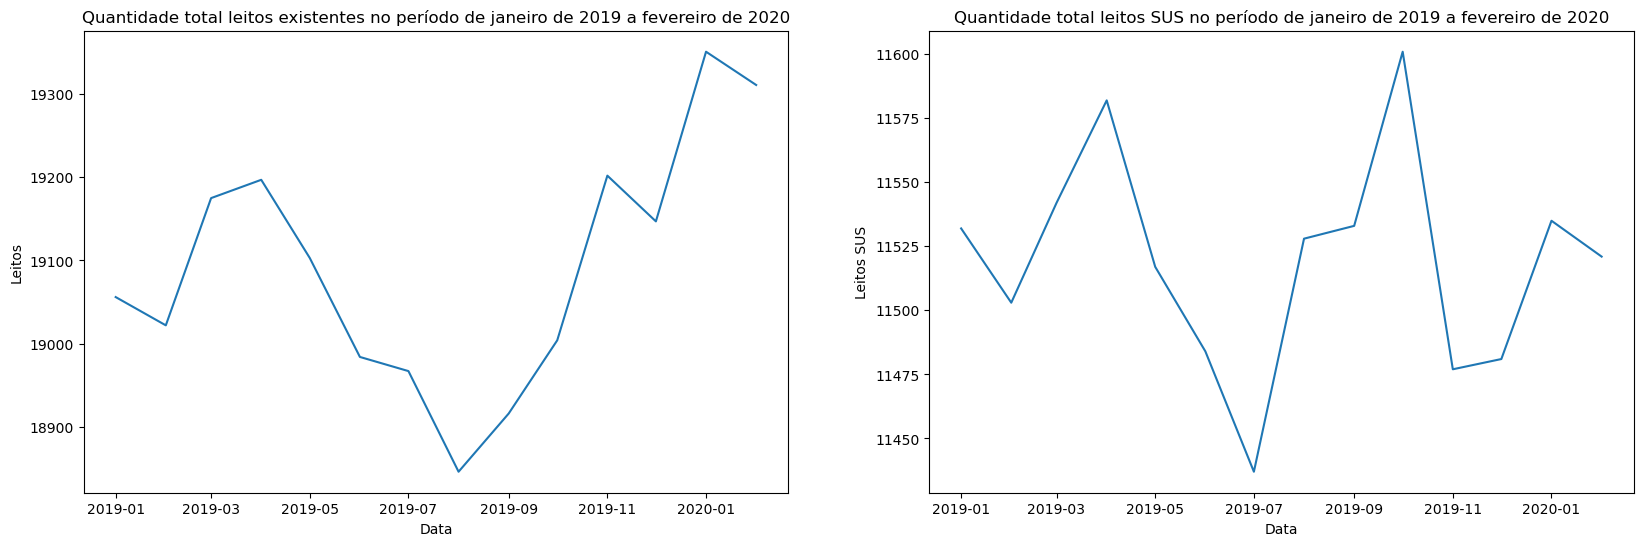

In [43]:
aux1 = df4[(df4['COMPETEN'] >= '2019-01-01') & (df4['COMPETEN'] <= '2020-02-29')]
aux2 = aux1.groupby('COMPETEN')['QT_EXIST'].sum()

aux3 =  df4[(df4['COMPETEN'] >= '2019-01-01') & (df4['COMPETEN'] <= '2020-02-29')]
aux4 = aux3.groupby('COMPETEN')['QT_SUS'].sum()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(aux2.index, aux2.values)
plt.xlabel('Data')
plt.ylabel('Leitos')
plt.title('Quantidade total leitos existentes no período de janeiro de 2019 a fevereiro de 2020')

#plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(aux4.index, aux4.values)
plt.xlabel('Data')
plt.ylabel('Leitos SUS')
plt.title('Quantidade total leitos SUS no período de janeiro de 2019 a fevereiro de 2020')


plt.show()

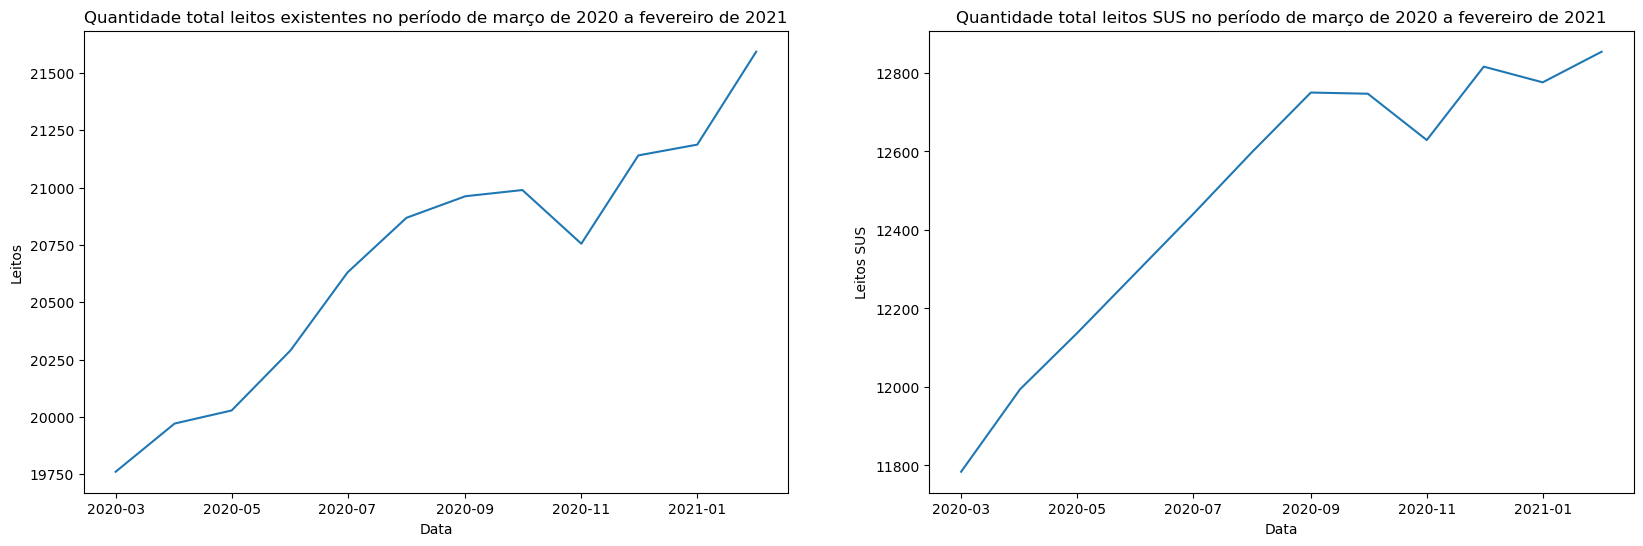

In [44]:
aux1 = df4[(df4['COMPETEN'] >= '2020-03-01') & (df4['COMPETEN'] <= '2021-02-28')]
aux2 = aux1.groupby('COMPETEN')['QT_EXIST'].sum()

aux3 =  df4[(df4['COMPETEN'] >= '2020-03-01') & (df4['COMPETEN'] <= '2021-02-28')]
aux4 = aux3.groupby('COMPETEN')['QT_SUS'].sum()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(aux2.index, aux2.values)
plt.xlabel('Data')
plt.ylabel('Leitos')
plt.title('Quantidade total leitos existentes no período de março de 2020 a fevereiro de 2021')

#plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(aux4.index, aux4.values)
plt.xlabel('Data')
plt.ylabel('Leitos SUS')
plt.title('Quantidade total leitos SUS no período de março de 2020 a fevereiro de 2021')


plt.show()

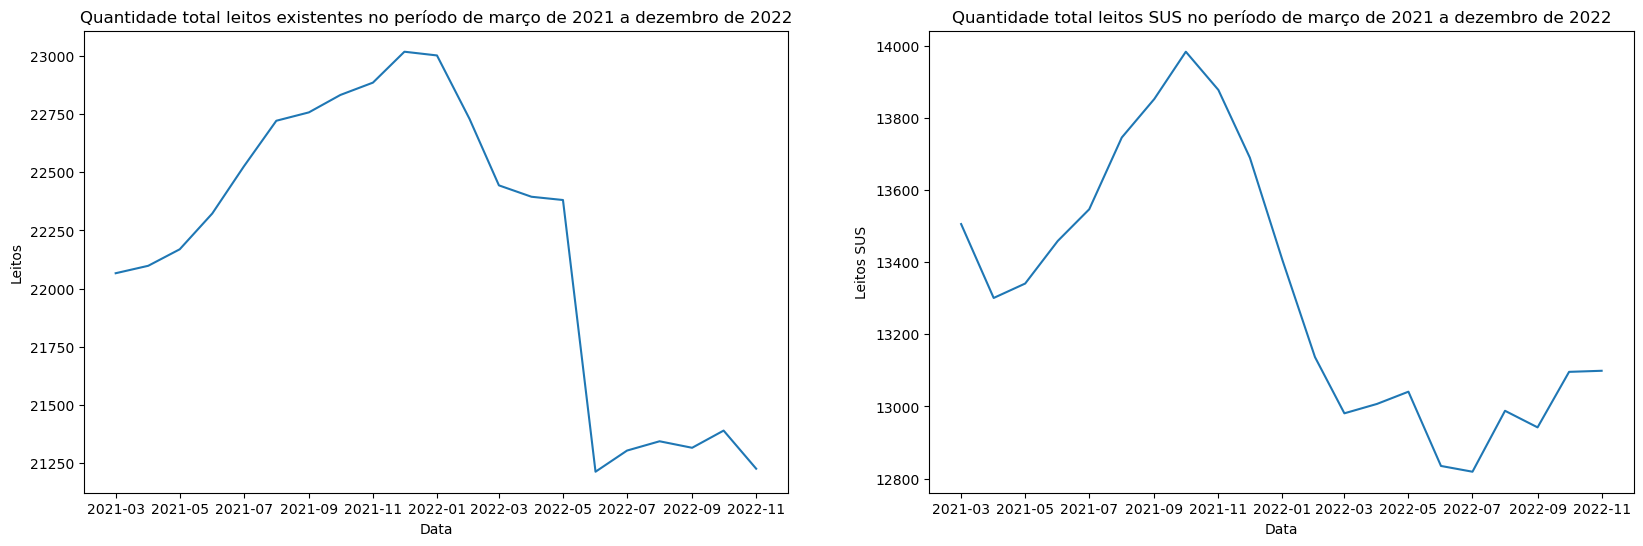

In [45]:
aux1 = df4[(df4['COMPETEN'] >= '2021-03-01') & (df4['COMPETEN'] <= '2022-11-30')]
aux2 = aux1.groupby('COMPETEN')['QT_EXIST'].sum()

aux3 =  df4[(df4['COMPETEN'] >= '2021-03-01') & (df4['COMPETEN'] <= '2022-11-30')]
aux4 = aux3.groupby('COMPETEN')['QT_SUS'].sum()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(aux2.index, aux2.values)
plt.xlabel('Data')
plt.ylabel('Leitos')
plt.title('Quantidade total leitos existentes no período de março de 2021 a dezembro de 2022')

#plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(aux4.index, aux4.values)
plt.xlabel('Data')
plt.ylabel('Leitos SUS')
plt.title('Quantidade total leitos SUS no período de março de 2021 a dezembro de 2022')


plt.show()

# 5.0. Dashboards